In [1]:
import sys
import pandas as pd
sys.path.append('../..')

# Creature

In [2]:
from lamarck import Creature

In [3]:
genome = {
    'x': 10,
    'y': 'A',
    'z': (1, 2, 3)
}

In [4]:
creature = Creature(genome)

In [5]:
creature.id

350751103660512638

# Genome Creator

In [6]:
from lamarck.assistant import GenomeCreator

In [7]:
genome_creator = GenomeCreator()

In [8]:
genome_creator.add_gene_specs.numeric(name='x',
                                      min=0,
                                      max=10,
                                      progression='linear',
                                      domain='int')

genome_creator.add_gene_specs.categorical(name='y', domain=['A', 'B', 'C', 'D', 'E'])

genome_creator.add_gene_specs.vectorial(name='z', length=4, replace=False, domain=['i', 'j', 'k', 'l', 'm'])

In [9]:
genome_blueprint = genome_creator.get_genome_blueprint()

In [10]:
genome_blueprint

{'x': {'type': 'numeric',
  'domain': 'int',
  'ranges': {'min': 0, 'max': 10, 'progression': 'linear'}},
 'y': {'type': 'categorical', 'domain': ['A', 'B', 'C', 'D', 'E']},
 'z': {'type': 'vectorial',
  'domain': ['i', 'j', 'k', 'l', 'm'],
  'ranges': {'length': 4, 'replace': False}}}

# Population Creator

In [11]:
from lamarck.assistant import PopulationCreator

In [12]:
pop_creator = PopulationCreator(genome_blueprint)

In [13]:
popdet = pop_creator.create.det(10)
popdet

Population with 1000 Creatures with genes x (numeric), y (categorical), z (vectorial).
        

In [14]:
popdet.datasets.main.head()

,x,y,z
0,0,A,"(i, j, k, l)"
1,0,A,"(i, l, j, k)"
2,0,A,"(j, i, k, l)"
3,0,A,"(j, l, i, k)"
4,0,A,"(k, i, j, l)"


In [15]:
poprand = pop_creator.create.rand(2000)
poprand

Population with 2000 Creatures with genes x (numeric), y (categorical), z (vectorial).
        

In [16]:
poprand.datasets.input.head()

,x,y,z
id,,,
-2343315789547106773,5,A,"(m, l, i, k)"
1635015029756663698,1,B,"(k, j, l, i)"
5732641332224216384,4,D,"(l, j, i, m)"
3600777870297941095,2,C,"(i, j, k, m)"
5464706345166054962,8,D,"(i, m, l, j)"


In [17]:
popdirty = popdet + poprand
popdirty

Population with 3000 Creatures with genes x (numeric), y (categorical), z (vectorial).
        

In [18]:
popdirty.datasets.input.head()

,x,y,z
id,,,
-6377645003138114473,0,A,"(i, j, k, l)"
-4854398439382140014,0,A,"(i, l, j, k)"
-5177463136661683501,0,A,"(j, i, k, l)"
-6931274389953361450,0,A,"(j, l, i, k)"
-652508397162970080,0,A,"(k, i, j, l)"


In [19]:
pop = popdirty.drop_duplicates()
pop

Population with 2082 Creatures with genes x (numeric), y (categorical), z (vectorial).
        

In [20]:
pop.datasets.input.head()

,x,y,z
id,,,
-6377645003138114473,0,A,"(i, j, k, l)"
-4854398439382140014,0,A,"(i, l, j, k)"
-5177463136661683501,0,A,"(j, i, k, l)"
-6931274389953361450,0,A,"(j, l, i, k)"
-652508397162970080,0,A,"(k, i, j, l)"


# Environment

In [21]:
from lamarck import Environment

In [22]:
import hashlib

def tuplehash(tuple_obj):
    encoded = ''.join(tuple_obj).encode()
    m = hashlib.md5()
    m.update(encoded)
    d = m.digest()
    return int.from_bytes(d, 'big')
    
    
def dummy_process(x, y, z):
    zval = (tuplehash(z) % 1000) / (x+1)**0.75
    yval = zval // ord(y) + tuplehash((y, y)) % 73
    return {
        'time': (x + 1) * abs(zval - yval) // 10,
        'profit': (abs(3*zval - 2*yval)**((int(x/10) + 1) % 9) // (tuplehash((y, y)) % 7 + 1)) % 10000 + (zval*yval) //10
    }

In [23]:
env = Environment()

In [24]:
env.config.set_process(dummy_process)

In [25]:
env.config.set_output_varibles('time', 'profit')

In [26]:
env.config

multi:   False
output_varibles:   ('time', 'profit')
process:   <function dummy_process at 0x7f3209ea6310>

In [27]:
cr = pop[10]
cr

Creature <8227899131304219844> - genome: {'x': 0, 'y': 'B', 'z': ('i', 'j', 'k', 'l')}

### Simulate Creature

In [28]:
env.simulate(cr)

{'time': 93.0, 'profit': 6323.0}

### Simulate Population

In [29]:
simpop = env.simulate(pop)

In [30]:
simpop

Population with 2082 Creatures with genes x (numeric), y (categorical), z (vectorial).
        

In [31]:
simpop.datasets.output.head()

,x,y,z,time,profit
-6377645003138114473,0,A,"(i, j, k, l)",95.0,2154.0
-4854398439382140014,0,A,"(i, l, j, k)",52.0,877.0
-5177463136661683501,0,A,"(j, i, k, l)",25.0,325.0
-6931274389953361450,0,A,"(j, l, i, k)",76.0,1492.0
-652508397162970080,0,A,"(k, i, j, l)",16.0,171.0


### Simulate Population - Multi Thread

In [32]:
env.config.set_multi(True)

In [33]:
simpop = env.simulate(pop)

In [34]:
simpop.datasets.output.head()

,x,y,z,time,profit
-6377645003138114473,0,A,"(i, j, k, l)",95.0,2154.0
-4854398439382140014,0,A,"(i, l, j, k)",52.0,877.0
-5177463136661683501,0,A,"(j, i, k, l)",25.0,325.0
-6931274389953361450,0,A,"(j, l, i, k)",76.0,1492.0
-652508397162970080,0,A,"(k, i, j, l)",16.0,171.0


# Fitness

### 1. Single Objective

In [35]:
single_objective_pop = simpop.apply_fitness.single_objective(output='time', objective='min')

In [36]:
single_objective_pop.datasets.fitness.head()

,x,y,z,time,profit,criteria
6169570088167091210,10,D,"(m, i, j, k)",0.0,86.0,0.0
6985559981651260374,9,E,"(i, k, m, l)",0.0,227.0,0.0
4459491884439036227,2,D,"(l, j, m, k)",0.0,32.0,0.0
5188603756708380101,6,A,"(j, l, i, m)",0.0,1.0,0.0
642139397544818635,1,A,"(m, l, i, j)",0.0,3.0,0.0


### 2. Multi Objective - Ranked

In [37]:
ranked_objective_pop = simpop.apply_fitness.multi_objective.ranked(priorities=['time', 'profit'], objectives=['min', 'max'])

In [38]:
ranked_objective_pop.datasets.fitness.head()

,x,y,z,time,profit,criteria0,criteria1
-119608305692111034,0,E,"(m, j, k, i)",0.0,277.0,0.0,277.0
4731536916938161600,0,E,"(k, i, j, m)",0.0,250.0,0.0,250.0
830350755679795832,1,E,"(k, m, l, j)",0.0,236.0,0.0,236.0
2114934944207812834,6,E,"(l, m, i, j)",0.0,232.0,0.0,232.0
7484395103258128608,2,E,"(m, i, j, k)",0.0,227.0,0.0,227.0


### 3. Multi Objective - Pareto

In [39]:
pareto_objective_pop = simpop.apply_fitness.multi_objective.pareto(outputs=['time', 'profit'], objectives=['min', 'max'])

In [40]:
pareto_objective_pop.datasets.fitness.head()

,x,y,z,time,profit,criteria0,criteria1,front,crowd
1154167961796706623,10,E,"(i, j, k, l)",122.0,10167.0,1.265489,8.101657,1,inf
-847312559579097849,4,A,"(m, l, i, j)",0.0,1.0,-1.472004,-0.669931,1,inf
4731536916938161600,0,E,"(k, i, j, m)",0.0,250.0,-1.472004,-0.455084,1,inf
-3600541832540001448,10,B,"(k, i, j, l)",6.0,1656.0,-1.337374,0.758062,1,6.484295
-3437589868106570349,10,B,"(l, k, i, j)",23.0,7599.0,-0.955920,5.885895,1,5.833717


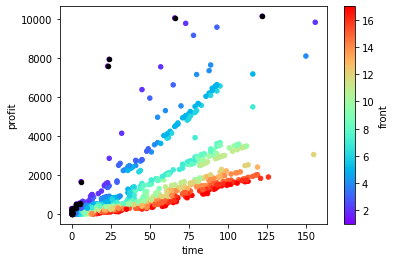

In [41]:
ax = pareto_objective_pop.plot.fronts('time', 'profit', 1)

# Selection